Generation of Supplementary figure 7. It is exactly the same as Figure S3, but for the simulations made with correlated mutational effects

In [1]:
from google.colab import files
import io
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

In [2]:
# Mounting my google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The mean Ks statistics are imported, first for N = 10^6

In [3]:
KS_means = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures/Mut_SD_bivariate_WGD/KS_means_WGD.csv',
                       index_col=0)

In [4]:
# Dictionary of mutational target size ratios
run_ratio = {'Bm05': '1/2', 'Bm1': '1', 'Bm2': '2', 'Bm3': '3', 'Bm4': '4', 
             'Bm5': '5', 'Bm6': '6', 'Bm7': '7', 'Bm8': '8', 'Bm9': '9', 
             'Bm10': '10'}

In [5]:
# The names in the run column are replaced with mutational target size ratios
for row in range(KS_means.shape[0]):
  KS_means.at[row, 'Run'] = run_ratio[KS_means.at[row, 'Run']]

# And the comparison column is dropped
KS_means = KS_means.drop('Comparison', axis=1)

Matrices are made for the two models

In [6]:
KS_min = KS_means[KS_means['Model'] == 'Minimal'].pivot(index='Mut_sd',
         columns='Run', values='KS stats')

KS_costpre = KS_means[KS_means['Model'] == 'Mixed'].pivot(index='Mut_sd',
             columns='Run', values='KS stats')

In [7]:
# Index are modified
dfs = [KS_min, KS_costpre]
for df in dfs:
    df.index = ['0.010', '0.025', '0.050', '0.075', '0.100', '0.125',
                '0.150', '0.200', '0.250', '0.350']

In [8]:
# For reordering the matrices
columns = ['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Reordering each matrix
KS_min = KS_min.reindex(labels=columns, axis='columns')
KS_costpre = KS_costpre.reindex(labels=columns, axis='columns')

The same process is repeated for simulations with N=10^5

In [9]:
KS_means_1e5 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures/Mut_SD_bivariate_WGD_1e5/KS_means_WGD_1e5.csv',
                       index_col=0)

In [10]:
# The names in the run column are replaced with mutational target size ratios
for row in range(KS_means.shape[0]):
  KS_means_1e5.at[row, 'Run'] = run_ratio[KS_means_1e5.at[row, 'Run']]

# And the comparison column is dropped
KS_means_1e5 = KS_means_1e5.drop('Comparison', axis=1)

In [11]:
KS_min_1e5 = KS_means_1e5[KS_means_1e5['Model'] == 'Minimal'].pivot(index='Mut_sd',
             columns='Run', values='KS stats')

KS_costpre_1e5 = KS_means_1e5[KS_means_1e5['Model'] == 'Mixed'].pivot(index='Mut_sd',
                 columns='Run', values='KS stats')

In [12]:
# Index are modified
dfs = [KS_min_1e5, KS_costpre_1e5]
for df in dfs:
    df.index = ['0.010', '0.025', '0.050', '0.075', '0.100', '0.125',
                '0.150', '0.200', '0.250', '0.350']

In [13]:
# Reordering each matrix
KS_min_1e5 = KS_min_1e5.reindex(labels=columns, axis='columns')
KS_costpre_1e5 = KS_costpre_1e5.reindex(labels=columns, axis='columns')

The figure can then be constructed

In [14]:
# Mins and max for the color scales
min_KS = np.min((KS_means['KS stats'].min(), KS_means_1e5['KS stats'].min()))
max_KS = np.max((KS_means['KS stats'].max(), KS_means_1e5['KS stats'].max()))

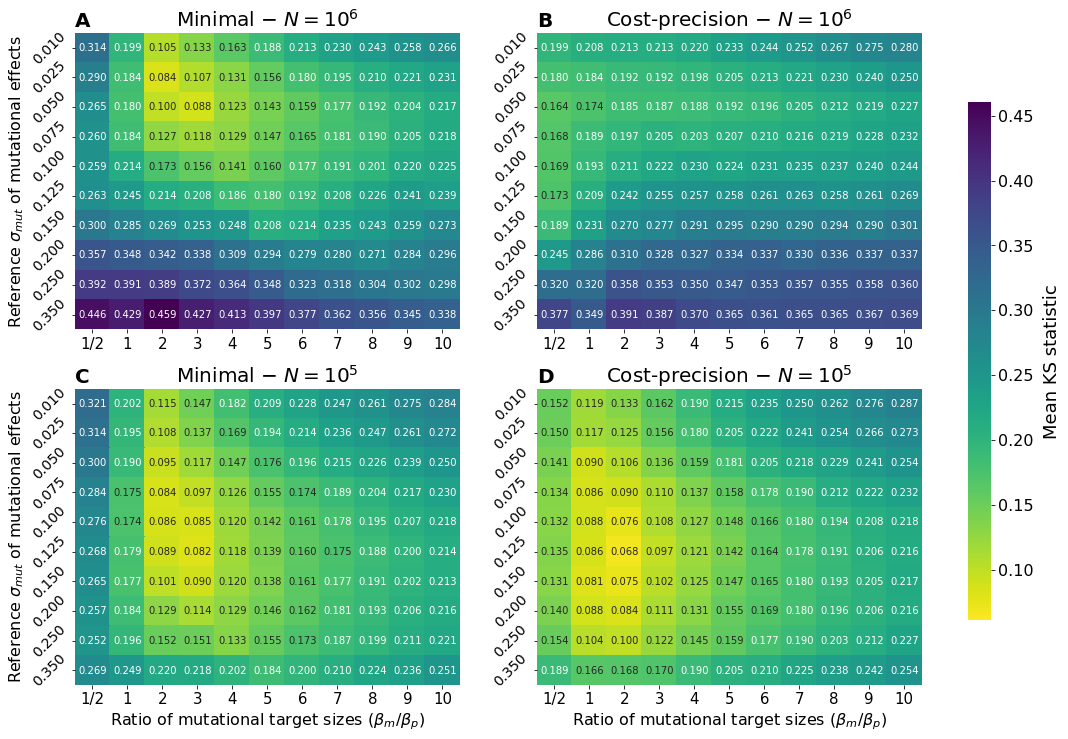

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

fig.subplots_adjust(right=0.86)
cbar_ax = fig.add_axes([0.9, 0.20, 0.02, 0.6])


# Minimal model
heat1 = sns.heatmap(KS_min, vmin=min_KS, vmax=max_KS, cmap='viridis_r', 
                    ax=axs[0,0], annot=True, fmt = '.3f', cbar_ax=cbar_ax)

heat2 = sns.heatmap(KS_min_1e5, vmin=min_KS, vmax=max_KS, cmap='viridis_r', 
                    ax=axs[1,0], annot=True, fmt = '.3f', cbar=False)

# Cost-precision model
heat3 = sns.heatmap(KS_costpre, vmin=min_KS, vmax=max_KS, cmap='viridis_r', 
                    ax=axs[0,1], annot=True, fmt = '.3f', cbar=False)

heat4 = sns.heatmap(KS_costpre_1e5, vmin=min_KS, vmax=max_KS, cmap='viridis_r', 
                    ax=axs[1,1], annot=True, fmt = '.3f', cbar=False)

# cbar labels
cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size=16)
cbar_ax.set_ylabel('Mean KS statistic', size=18, labelpad=10)

# Heatmaps axes
for ax in [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]:
  ax.set_xticklabels(ax.get_xmajorticklabels(), size=15)
  
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
  ax.set_yticklabels(ax.get_ymajorticklabels(), size=14, rotation=45)

# Axes labels
axs[0,0].set_ylabel(r"Reference $\sigma_{mut}$ of mutational effects", fontsize=16)
axs[1,0].set_ylabel(r"Reference $\sigma_{mut}$ of mutational effects", fontsize=16)

axs[0,0].set_xlabel('')
axs[0,1].set_xlabel('')

axs[1,0].set_xlabel(r"Ratio of mutational target sizes ($\beta_m$/$\beta_p$)", 
                    fontsize=16)
axs[1,1].set_xlabel(r"Ratio of mutational target sizes ($\beta_m$/$\beta_p$)", 
                    fontsize=16)

# Titles
axs[0,0].set_title(r"Minimal $-$ $N = 10^6$", fontsize=20)
axs[0,1].set_title(r"Cost-precision $-$ $N = 10^6$", fontsize=20)
axs[1,0].set_title(r"Minimal $-$ $N = 10^5$", fontsize=20)
axs[1,1].set_title(r"Cost-precision $-$ $N = 10^5$", fontsize=20)

# Figure annotations
axs[0,0].annotate('A', (0, 1.02), xycoords='axes fraction', 
                      fontsize=20, fontweight='bold')
axs[0,1].annotate('B', (0, 1.02), xycoords='axes fraction', 
                      fontsize=20, fontweight='bold')
axs[1,0].annotate('C', (0, 1.02), xycoords='axes fraction', 
                      fontsize=20, fontweight='bold')
axs[1,1].annotate('D', (0, 1.02), xycoords='axes fraction', 
                      fontsize=20, fontweight='bold')

FigS8 = plt.gcf()
FigS8.savefig('/content/drive/My Drive/Redaction_SA/Final_figures/SuppFig7.pdf',
              bbox_inches='tight')